<a href="https://colab.research.google.com/github/keto08/Employee-Retention-Analysis/blob/master/Employee_Retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Employee Retention Case Study - Figuring out which employees may quit and who would stay

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading employee data
file_name = "https://raw.githubusercontent.com/keto08/Employee-Retention-Analysis/master/hr_data.csv"
hr_df = pd.read_csv(file_name)
hr_df#.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low


In [3]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [4]:
# View columns that are categorical
hr_df.select_dtypes(exclude=['int', 'float']).columns

Index(['department', 'salary'], dtype='object')

In [5]:
#loading employee satisfaction data
file_name = "https://raw.githubusercontent.com/keto08/Employee-Retention-Analysis/master/employee_satisfaction_evaluation.xlsx"
emp_sat = pd.read_excel(file_name)
emp_sat#.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52
...,...,...,...
14994,87670,0.40,0.57
14995,87673,0.37,0.48
14996,87679,0.37,0.53
14997,87681,0.11,0.96


### Join both tables


In [6]:
main_df = hr_df.set_index('employee_id').join(emp_sat.set_index('EMPLOYEE #'))
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [7]:
#checking for null values
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


##### so we have few NaN values in the evaluation part, which will have to be filled by the general mean of all values

In [8]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
main_df.fillna(main_df.mean(), inplace=True)
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [10]:
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation


In [11]:
# don't need a unique value like employee ID
main_df_final = main_df.drop(columns='employee_id')
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


#### EDA

In [12]:
main_df_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [13]:
main_df_final.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [14]:
main_df_final['department'].value_counts().to_frame()

,department
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739
management,630


In [15]:
main_df_final['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

No handles with labels found to put in legend.


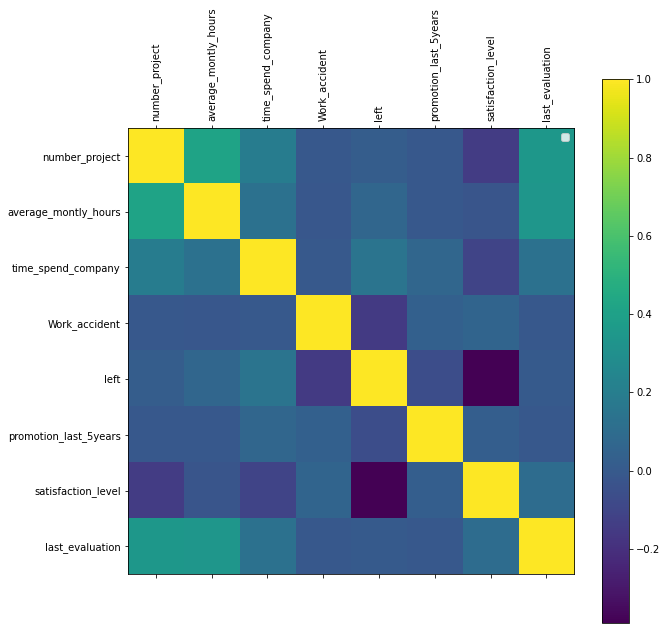

In [16]:
#corelation matrix
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(main_df_final)

##### time spend and left are strongly related while satisfaction level and left are weakly related - makes sense

#### Let's prepare the dataset for modelling

In [17]:
#One Hot Encoding on Categorical Data

categorial = ['department','salary']
main_df_final = pd.get_dummies(main_df_final, columns=categorial, drop_first=True)
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [18]:
main_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number_project          14999 non-null  int64  
 1   average_montly_hours    14999 non-null  int64  
 2   time_spend_company      14999 non-null  int64  
 3   Work_accident           14999 non-null  int64  
 4   left                    14999 non-null  int64  
 5   promotion_last_5years   14999 non-null  int64  
 6   satisfaction_level      14999 non-null  float64
 7   last_evaluation         14999 non-null  float64
 8   department_RandD        14999 non-null  uint8  
 9   department_accounting   14999 non-null  uint8  
 10  department_hr           14999 non-null  uint8  
 11  department_management   14999 non-null  uint8  
 12  department_marketing    14999 non-null  uint8  
 13  department_product_mng  14999 non-null  uint8  
 14  department_sales        14999 non-null

#### Let the learning begin!

In [19]:
from sklearn.model_selection import train_test_split

# Remove the label values from training data
X = main_df_final.drop(['left'],axis=1).values

# Assign those label values to Y dataset
y = main_df_final['left'].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.647153,0.442658,2.398976,-0.409065,-0.14999,0.187368,0.895836,-0.239154,-0.230346,-0.230575,-0.212105,-0.24576,-0.25816,1.639038,-0.416807,-0.470059,-0.973584,-0.873023
1,-0.647153,-0.217931,4.453816,-0.409065,-0.14999,0.066892,-0.384964,-0.239154,-0.230346,-0.230575,-0.212105,-0.24576,-0.25816,1.639038,-0.416807,-0.470059,-0.973584,1.145446
2,-0.647153,-0.738396,-1.025756,-0.409065,-0.14999,0.147209,-0.326746,-0.239154,-0.230346,-0.230575,-0.212105,-0.24576,-0.25816,1.639038,-0.416807,-0.470059,1.027132,-0.873023
3,-0.647153,-0.718378,-0.340810,-0.409065,-0.14999,0.107051,-0.268528,-0.239154,-0.230346,-0.230575,-0.212105,-0.24576,-0.25816,1.639038,-0.416807,-0.470059,1.027132,-0.873023
4,-1.456884,-0.898539,-0.340810,-0.409065,-0.14999,-0.977236,-1.491110,-0.239154,-0.230346,-0.230575,-0.212105,-0.24576,-0.25816,1.639038,-0.416807,-0.470059,1.027132,-0.873023


In [23]:
df_test = pd.DataFrame(X_test)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.456884,1.263391,-0.340810,2.444602,-0.14999,0.548797,0.371872,-0.239154,-0.230346,-0.230575,-0.212105,-0.24576,-0.25816,-0.610114,-0.416807,2.127390,-0.973584,1.145446
1,0.162579,1.163302,-0.340810,2.444602,-0.14999,0.789749,0.662963,-0.239154,-0.230346,-0.230575,-0.212105,-0.24576,-0.25816,-0.610114,-0.416807,2.127390,1.027132,-0.873023
2,0.162579,-0.878521,-0.340810,-0.409065,-0.14999,0.588956,-0.559619,-0.239154,4.341299,-0.230575,-0.212105,-0.24576,-0.25816,-0.610114,-0.416807,-0.470059,-0.973584,1.145446
3,0.972310,-0.738396,-0.340810,-0.409065,-0.14999,0.307844,1.419800,-0.239154,-0.230346,-0.230575,-0.212105,-0.24576,-0.25816,-0.610114,-0.416807,2.127390,1.027132,-0.873023
4,2.591773,1.483588,0.344137,-0.409065,-0.14999,-2.021363,0.954054,-0.239154,-0.230346,-0.230575,-0.212105,-0.24576,-0.25816,-0.610114,2.399190,-0.470059,1.027132,-0.873023


#### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.3f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 79.222%
[[3200  234]
 [ 701  365]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3434
           1       0.61      0.34      0.44      1066

    accuracy                           0.79      4500
   macro avg       0.71      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500



#### Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)

predictions = model_RF.predict(X_test)
score = model_RF.score(X_test, y_test)

print("Accuracy {0:.3f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 98.889%
[[3429    5]
 [  45 1021]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3434
           1       1.00      0.96      0.98      1066

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



#### Neural Network

In [26]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim=18))
model.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [27]:
%tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 171       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [30]:
batch_size = 10
epochs = 25

model.fit(X_train, y_train,
                   batch_size = batch_size,
                   epochs = epochs,
                   verbose = 1,
                   validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1578 - accuracy: 0.9541 - val_loss: 0.1618 - val_accuracy: 0.9527
Epoch 2/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1568 - accuracy: 0.9541 - val_loss: 0.1618 - val_accuracy: 0.9562
Epoch 3/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1566 - accuracy: 0.9559 - val_loss: 0.1642 - val_accuracy: 0.9536
Epoch 4/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1565 - accuracy: 0.9551 - val_loss: 0.1618 - val_accuracy: 0.9551
Epoch 5/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1560 - accuracy: 0.9552 - val_loss: 0.1605 - val_accuracy: 0.9542
Epoch 6/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1557 - accuracy: 0.9533 - val_loss: 0.1607 - val_accuracy: 0.9562
Epoch 7/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1550 - accuracy: 0.9560 - val_loss: 0.1625 - val_accuracy:

In [33]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print("Accuracy {0:.3f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 95.667%
[[3356   78]
 [ 117  949]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3434
           1       0.92      0.89      0.91      1066

    accuracy                           0.96      4500
   macro avg       0.95      0.93      0.94      4500
weighted avg       0.96      0.96      0.96      4500



#### A deeper neural network

In [34]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(270, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 1
model2.add(Dense(180, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
model2.add(Dense(90, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 270)               5130      
_________________________________________________________________
dropout (Dropout)            (None, 270)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 180)               48780     
_________________________________________________________________
dropout_1 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 90)                16290     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 91        
Total params: 70,291
Trainable params: 70,291
Non-trainable params: 0
__________________________________________________

In [35]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
batch_size = 10
epochs = 25

history = model2.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.6495 - accuracy: 0.9053 - val_loss: 0.2756 - val_accuracy: 0.9473
Epoch 2/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2786 - accuracy: 0.9404 - val_loss: 0.2630 - val_accuracy: 0.9476
Epoch 3/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2617 - accuracy: 0.9423 - val_loss: 0.2429 - val_accuracy: 0.9493
Epoch 4/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2571 - accuracy: 0.9408 - val_loss: 0.2339 - val_accuracy: 0.9484
Epoch 5/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2476 - accuracy: 0.9465 - val_loss: 0.2333 - val_accuracy: 0.9500
Epoch 6/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2466 - accuracy: 0.9441 - val_loss: 0.2319 - val_accuracy: 0.9467
Epoch 7/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2386 - accuracy: 0.9464 - val_loss: 0.2358 - val_accuracy:

In [37]:
predictions = model2.predict(X_test)
predictions = (predictions > 0.5)

print("Accuracy {0:.3f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 95.622%
[[3350   84]
 [ 113  953]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3434
           1       0.92      0.89      0.91      1066

    accuracy                           0.96      4500
   macro avg       0.94      0.93      0.94      4500
weighted avg       0.96      0.96      0.96      4500



#### As we can see, the best results were given by the random forest classifier, closely followed by the neural network. We will now determine the factors which are influential in an employee leaving

In [39]:
feature_importances = pd.DataFrame(model_RF.feature_importances_,
                                   index = pd.DataFrame(X_train).columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
5,0.323634
2,0.184377
0,0.182910
1,0.146790
6,0.119941
3,0.009238
16,0.008299
15,0.003741
17,0.003522
13,0.003227


In [42]:
main_df_final.drop(['left'],axis=1).columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [43]:
# index[5] = satisfaction_level
# index[2] = time_spend_company
# index[0] = number_project
# index[1] = average_montly_hours

### Conclusion

#### So as we can see, the most important features of the data, hence the most important factors that lead to the departure of an employee is satisfaction level, followed by time spent at the company, average monthly hours (basically long hours) and number of projects